In [1]:
# Packages
import pandas as pd

In [2]:
# Reading in data
df = pd.read_csv("heart_rate_dataset.csv", sep = ";")
df

,age,sex,chest_pain_level,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecd,maximum hearth_rate,exercise_induced_angina,previous_peak,slope,number_of_major_vessels,thal_rate,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Checking for missing data
df.isnull().sum()

age                        0
sex                        0
chest_pain_level           0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
resting_ecd                0
maximum hearth_rate        0
exercise_induced_angina    0
previous_peak              0
slope                      0
number_of_major_vessels    0
thal_rate                  0
output                     0
dtype: int64

#We don't have any missing data, so we can proceed!

In [4]:
# Checking data types
df.dtypes

age                          int64
sex                          int64
chest_pain_level             int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
resting_ecd                  int64
maximum hearth_rate          int64
exercise_induced_angina      int64
previous_peak              float64
slope                        int64
number_of_major_vessels      int64
thal_rate                    int64
output                       int64
dtype: object

In [5]:
# Converting the relevant data types
df["sex"] = df["sex"].astype("category")
df["chest_pain_level"] = df["chest_pain_level"].astype("category")
df["fasting_blood_sugar"] = df["fasting_blood_sugar"].astype("category")
df["resting_ecd"] = df["resting_ecd"].astype("category")
df["resting_blood_pressure"] = df["resting_blood_pressure"].astype("float64")
df["cholesterol"] = df["cholesterol"].astype("float64")
df["maximum hearth_rate"] = df["maximum hearth_rate"].astype("float64")
df["exercise_induced_angina"] = df["exercise_induced_angina"].astype("category")
df["slope"] = df["slope"].astype("category")
df["exercise_induced_angina"] = df["exercise_induced_angina"].astype("category")
df["thal_rate"] = df["thal_rate"].astype("category")
df["output"] = df["output"].astype("category")

df.dtypes

age                           int64
sex                        category
chest_pain_level           category
resting_blood_pressure      float64
cholesterol                 float64
fasting_blood_sugar        category
resting_ecd                category
maximum hearth_rate         float64
exercise_induced_angina    category
previous_peak               float64
slope                      category
number_of_major_vessels       int64
thal_rate                  category
output                     category
dtype: object

In [6]:
# Training and testing data split
from sklearn.model_selection import train_test_split

X = df[["age", "sex", "chest_pain_level", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar",
        "resting_ecd", "maximum hearth_rate", "exercise_induced_angina", "previous_peak", "slope", "number_of_major_vessels", 
        "thal_rate"]]
y = df["output"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#Building the model

In [7]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8571428571428571

Text(33.0, 0.5, 'Actual Heart Attack Values')

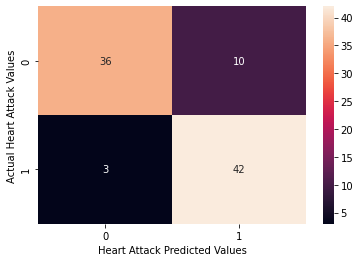

In [8]:
# Model Predictions
y_pred = lr_model.predict(X_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(figsize = (10, 7))
sn.heatmap(cm, annot = True)
plt.xlabel("Heart Attack Predicted Values")
plt.ylabel("Actual Heart Attack Values")

In [9]:
# SVM
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_model.score(X_test, y_test)

0.5714285714285714